In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [36]:
tabela = pd.read_csv("Base de dados do Enem.csv")
display(tabela)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_MEDIA
0,210054403757,2021,14,M,2,3,1,1,15,1,...,A,A,B,A,A,B,A,A,A,NaN
1,210053662224,2021,5,F,1,3,1,1,4,1,...,A,A,B,A,A,C,A,B,B,546.56
2,210053154359,2021,14,F,0,3,1,1,12,1,...,A,A,B,A,A,B,A,A,A,431.38
3,210054036560,2021,3,F,1,4,1,2,0,2,...,A,A,B,A,A,C,A,A,B,565.80
4,210051462654,2021,2,F,1,4,1,2,0,3,...,A,A,E,A,A,E,A,B,B,576.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168974,210054094463,2021,11,F,1,0,1,1,10,1,...,A,A,B,A,A,D,A,B,B,NaN
168975,210052080037,2021,10,F,1,3,1,1,9,1,...,A,A,B,A,A,B,A,B,B,NaN
168976,210053303620,2021,3,F,1,1,1,1,1,1,...,A,A,B,A,A,B,A,A,A,NaN
168977,210052444452,2021,8,F,1,3,1,1,5,1,...,A,A,A,A,A,B,A,B,B,507.86


In [37]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168979 entries, 0 to 168978
Data columns (total 77 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            168979 non-null  int64  
 1   NU_ANO                  168979 non-null  int64  
 2   TP_FAIXA_ETARIA         168979 non-null  int64  
 3   TP_SEXO                 168979 non-null  object 
 4   TP_ESTADO_CIVIL         168979 non-null  int64  
 5   TP_COR_RACA             168979 non-null  int64  
 6   TP_NACIONALIDADE        168979 non-null  int64  
 7   TP_ST_CONCLUSAO         168979 non-null  int64  
 8   TP_ANO_CONCLUIU         168979 non-null  int64  
 9   TP_ESCOLA               168979 non-null  int64  
 10  TP_ENSINO               53356 non-null   float64
 11  IN_TREINEIRO            168979 non-null  int64  
 12  CO_MUNICIPIO_ESC        39736 non-null   float64
 13  NO_MUNICIPIO_ESC        39736 non-null   object 
 14  CO_UF_ESC           

In [38]:
#tabela.isna().sum().sort_values(ascending=False)

In [39]:
# Calculando a média das competências
#tabela['nota_media'] = tabela[['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']].mean(axis=1)
# Somando a nota da redação à média das competências
#tabela['nota_media'] += tabela['NU_NOTA_REDACAO']
# Ordenando a tabela pela nota_media em ordem decrescente
#tabela_notamedia = tabela.sort_values(by='nota_media', ascending=False)
# Exibindo a tabela
#display(tabela)

<Axes: xlabel='NU_MEDIA', ylabel='Count'>

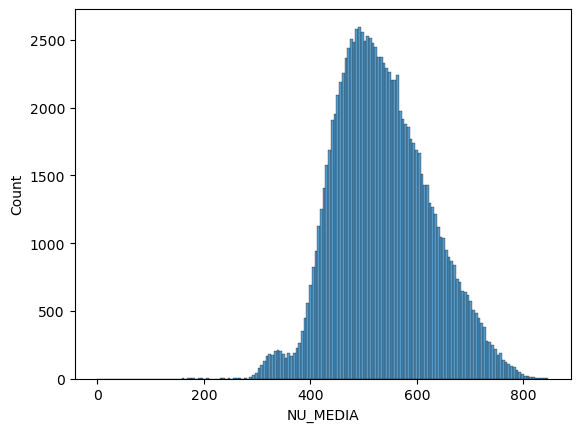

In [40]:
sns.histplot(data=tabela, x='NU_MEDIA')


<Axes: ylabel='NU_MEDIA'>

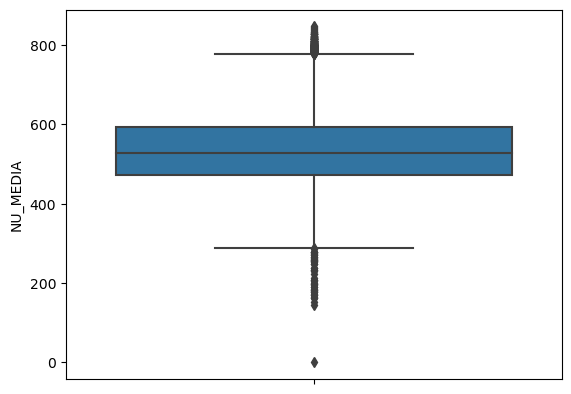

In [41]:
sns.boxplot(data=tabela, y='NU_MEDIA')

In [42]:
# Obtendo o valor máximo da coluna "NU_MEDIA"
max_valor = tabela['NU_MEDIA'].max()

# Obtendo o valor mínimo da coluna "NU_MEDIA"
min_valor = tabela['NU_MEDIA'].min()

# Imprimindo os valores máximo e mínimo
print("Valor máximo: {:.2f}".format(max_valor))
print("Valor mínimo: {:.2f}".format(min_valor))

Valor máximo: 846.66
Valor mínimo: 0.00


In [43]:
# Obtendo os parâmetros estatísticos do boxplot da coluna "NU_MEDIA"
stats = tabela['NU_MEDIA'].describe()

# Imprimindo os parâmetros estatísticos
print(stats)

count    110234.000000
mean        535.081736
std          88.804250
min           0.000000
25%         471.220000
50%         527.340000
75%         593.960000
max         846.660000
Name: NU_MEDIA, dtype: float64


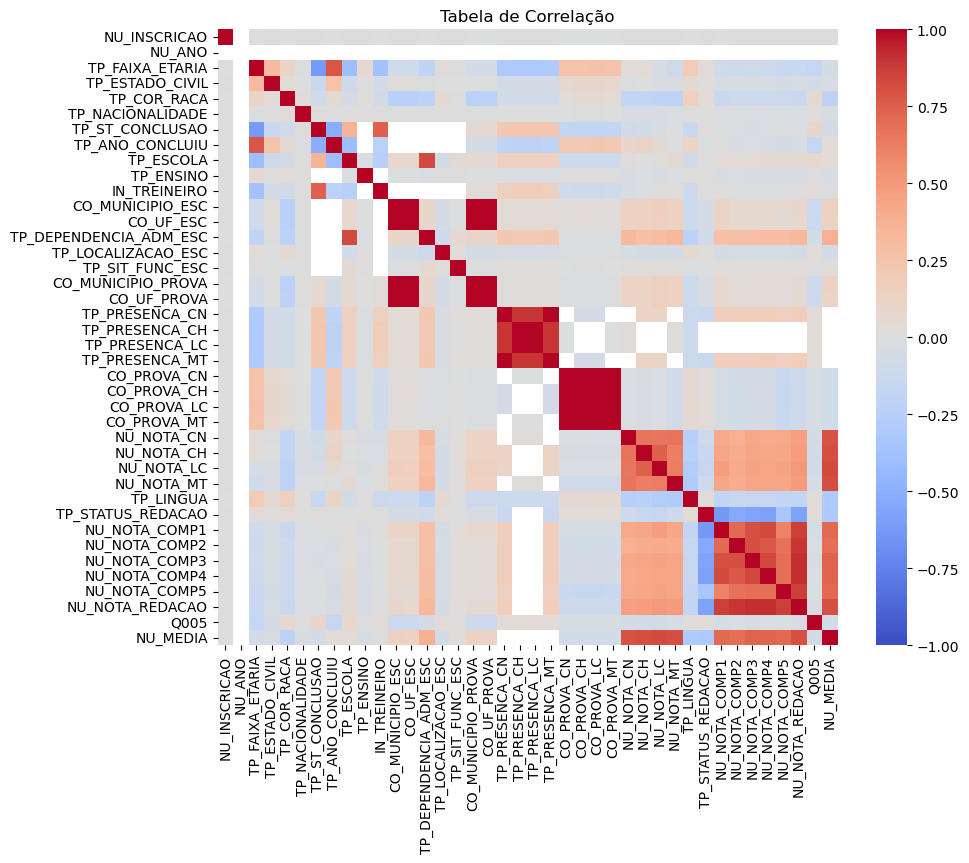

In [44]:
# Calculando a matriz de correlação
correlation_matrix = tabela.corr(numeric_only=True)

# Plotando a tabela de correlação utilizando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Tabela de Correlação')
plt.show()

Para realizar a analise de regressão linear entre a variavel NU_MEDIA e a primeira Questão do questionário sócioeconomico serão seguidos os passos abaixo:

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [46]:
#encoder = OneHotEncoder(sparse_output=False)
#encoder.fit(tabela[['Q001']])

In [47]:
#Q001_encoded = encoder.transform(tabela[['Q001']])

In [48]:
#Q001_encoded_df = pd.DataFrame(Q001_encoded, columns=encoder.get_feature_names_out(['Q001']))

In [49]:
#tabela_encoded = pd.concat([tabela, Q001_encoded_df], axis=1)

In [52]:
# Selecionar apenas as colunas necessárias
dados_relevantes = tabela[['Q001', 'NU_MEDIA']]

# Realizar o mapeamento da variável Q001 para valores numéricos
dados_relevantes['Q001'] = dados_relevantes['Q001'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8})

# Remover linhas com valores nulos, se necessário
dados_relevantes = dados_relevantes.dropna()

# Separar a variável dependente (NU_MEDIA) das variáveis independentes (Q001)
X = dados_relevantes[['Q001']]
y = dados_relevantes['NU_MEDIA']

# Criar e treinar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X, y)

# Para obter os coeficientes estimados
coeficientes = pd.DataFrame({'Variável': X.columns, 'Coeficiente': regressor.coef_})

# Imprimir os coeficientes estimados
print(coeficientes)

# Imprimir o coeficiente de determinação (R²) do modelo
print('Coeficiente de Determinação (R²):', regressor.score(X, y))

  Variável  Coeficiente
0     Q001    11.551106
Coeficiente de Determinação (R²): 0.059251518088050736


C:\Users\glauc\AppData\Local\Temp\ipykernel_696\671147688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_relevantes['Q001'] = dados_relevantes['Q001'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8})
